# Training a Deep Learning model for Point Cloud Classification

## Introduction

One of the most important initial steps in the workflow of '3D Basemap' solutions, is the classification of LiDAR Point Clouds. This sample notebook provides a reference for how to train a deep learning model for point cloud classification, when the bundled deep learning models in the solution are not used.

To achieve this, the ArcGIS API for Python's implementation of PointCNN is used. Further details on the PointCNN implementation in the API (working principle, architecture, best practices, etc.), can be found <a href="https://developers.arcgis.com/python/guide/point-cloud-segmentation-using-pointcnn">here</a>, along with instructions on how to set up the Python environment. Additional sample notebooks related to PointCNN can be found <a href="https://developers.arcgis.com/python/sample-notebooks/">here</a>.

Before proceeding through this notebook, it is advised to go through the API Reference for PointCNN (`export_point_dataset()`, `prepare_data()`, `Transform3d()`, & `PointCNN()`), that can be found <a href="http://developers.arcgis.com/python/api-reference/arcgis.learn.html">here</a>. It will help in understanding the PointCNN's workflow in detail.

## Preparing the data

1. Convert the dataset into `.las` format.<i> (Refer, ArcGIS Pro's <a href="https://pro.arcgis.com/en/pro-app/tool-reference/conversion/convert-las.htm">'Convert LAS'</a> GP tool.)</i>


2. Split all the `.las` files into three unique sets, one for training, one for validation, and one for testing. There is no fixed rule, but generally, the validation data for point cloud in `.las` format should be at least 1 % (by size) of the total data available, with appropriate diversity within the validation dataset.<i> (For ease in splitting the big `.las` files into the appropriate ratios, ArcGIS Pro's <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/tile-las.htm">'Tile LAS'</a> GP tool, can be used.)</i>


3. Reassign classcodes, if needed. Consider the 'object of interest' or any requirement related to the workflow of the 3D Basemap solution. <i> (Refer, ArcGIS Pro's <a href="https://pro.arcgis.com/en/pro-app/tool-reference/3d-analyst/change-las-class-codes.htm">'Change LAS Class Codes'</a> GP tool.)</i>

## Imports

In [ ]:
from arcgis.learn import export_point_dataset, prepare_data, PointCNN

## Exporting the data

In this step, `.las` files are converted to 'HDF5 binary data format'. The function `export_point_dataset()` is used for this.

Apart from that, the folder structure for the 'data_path' argument must contain two folders, 'train' & 'val', which should have the training and validation files, respectively. <i> (As shown in figure 1.)</i>

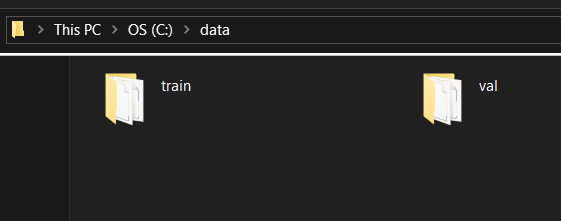
**<center>Figure 1</center>**



The `export_point_dataset()` function only needs an 'input folder' path and an 'output folder' path. The rest of the arguments have an appropriate default value, which should be valid in most cases. Here, 'extra_features' is used to include additional attributes from LiDAR data, like intensity, number of returns, etc.

In [ ]:
path = 'data'
output_path = 'export'


export_point_dataset(path, output_path, 
                     extra_features=[('intensity', 5000, 0), ('num_returns', 5, 0)])

## Training the model

This section is divided into two parts, preparing the training data and training the model.

For `prepare_data()`, the argument 'batch_size' controls the number of training samples to be processed at one time. If you have a powerful GPU, this number can be further increased.

In [ ]:
data = prepare_data(output_path, dataset_type='PointCloud', batch_size=2)

In [ ]:
pc = PointCNN(data)

The `lr_find()` function is used to control the rate at which existing information will be overwritten by newly acquired information throughout the training process. If no value is specified, the optimal learning rate will be extracted from the learning curve during the training process.

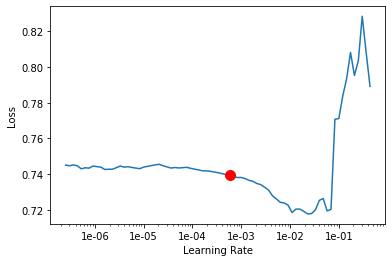

0.0005754399373371565

In [ ]:
pc.lr_find()

In `fit()`, the argument 'epochs' controls the maximum number of epochs for which the model will be trained. A maximum epoch of one means the dataset will be passed forward and backward through the neural network one time. If 'early_stopping' is True, then the model training will stop when the model is no longer improving, regardless of the 'epochs' parameter value specified.

In [ ]:
pc.fit(40, 0.0005754399373371565, early_stopping=True)

epoch,train_loss,valid_loss,accuracy,time
0,0.332195,0.237140,0.924130,1:52:08
1,0.235514,0.145923,0.954341,1:45:18
2,0.212749,0.143809,0.954955,1:43:04
3,0.171458,0.178612,0.931577,1:43:16
4,0.175261,0.163094,0.944441,3:38:45
5,0.141523,0.163715,0.952164,1:49:48
6,0.110648,0.201771,0.955076,1:44:03


Epoch 7: early stopping


## Saving the model

The `save()` function is used to the save the trained model. The saved folder will contain the ESRI model definition file, which will be required by the "Deep Learning Tools" in the 3D Basemap Solution as an input for referencing. Alternatively, `predict_las()` can be used for inferencing.

In [ ]:
pc.save('Trained_model')

WindowsPath('data_/models/Trained_model')

## Utilizing the Saved Model in 3D Basemap Solutions

Once the model has been saved, it is then ready to be implemented in the deep learning tools provided with the solution. As the deep learning tools are object-specific, it is important to use the appropriate tool. For example, if a user trains a model specifically for tree points, then the 'classify tree points using deep learning' tool should be used. The provided object-specific deep learning tools also expect the model's classcode to be specific. For example, the 'classify tree points using deep learning' tool expects the user-trained model's classcode for tree points to be '5'. The user-trained model's classcode can be remapped to some other classcode when writing in the `.las` files.

This notebook has summarized the workflow for the training of a deep learning model for point cloud classification, intended to be used when the bundled models in the 3D Basemap solution are not utilized.